# Human Motion Prediction - Plots

Source: 
https://www.kaggle.com/code/harikishantk/human-motion-prediction-with-cnn-lstm-model

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

from tqdm import tqdm
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

import itertools

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'


In [2]:
label_data = pd.read_csv("./data/UCF-101/ucfTrainTestlist/classInd.txt", sep=' ', header=None)
label_data.columns=['index', 'labels']
label_data = label_data.drop(['index'], axis=1)
label_data.head()

,labels
0,ApplyEyeMakeup
1,ApplyLipstick
2,Archery
3,BabyCrawling
4,BalanceBeam


In [3]:
#Total Number of video folders for classification
len(label_data)

101

In [4]:
path=[]
for label in label_data.labels.values:
    path.append('./data/UCF-101/'+label+"/")
path[0]

'./data/UCF-101/ApplyEyeMakeup/'

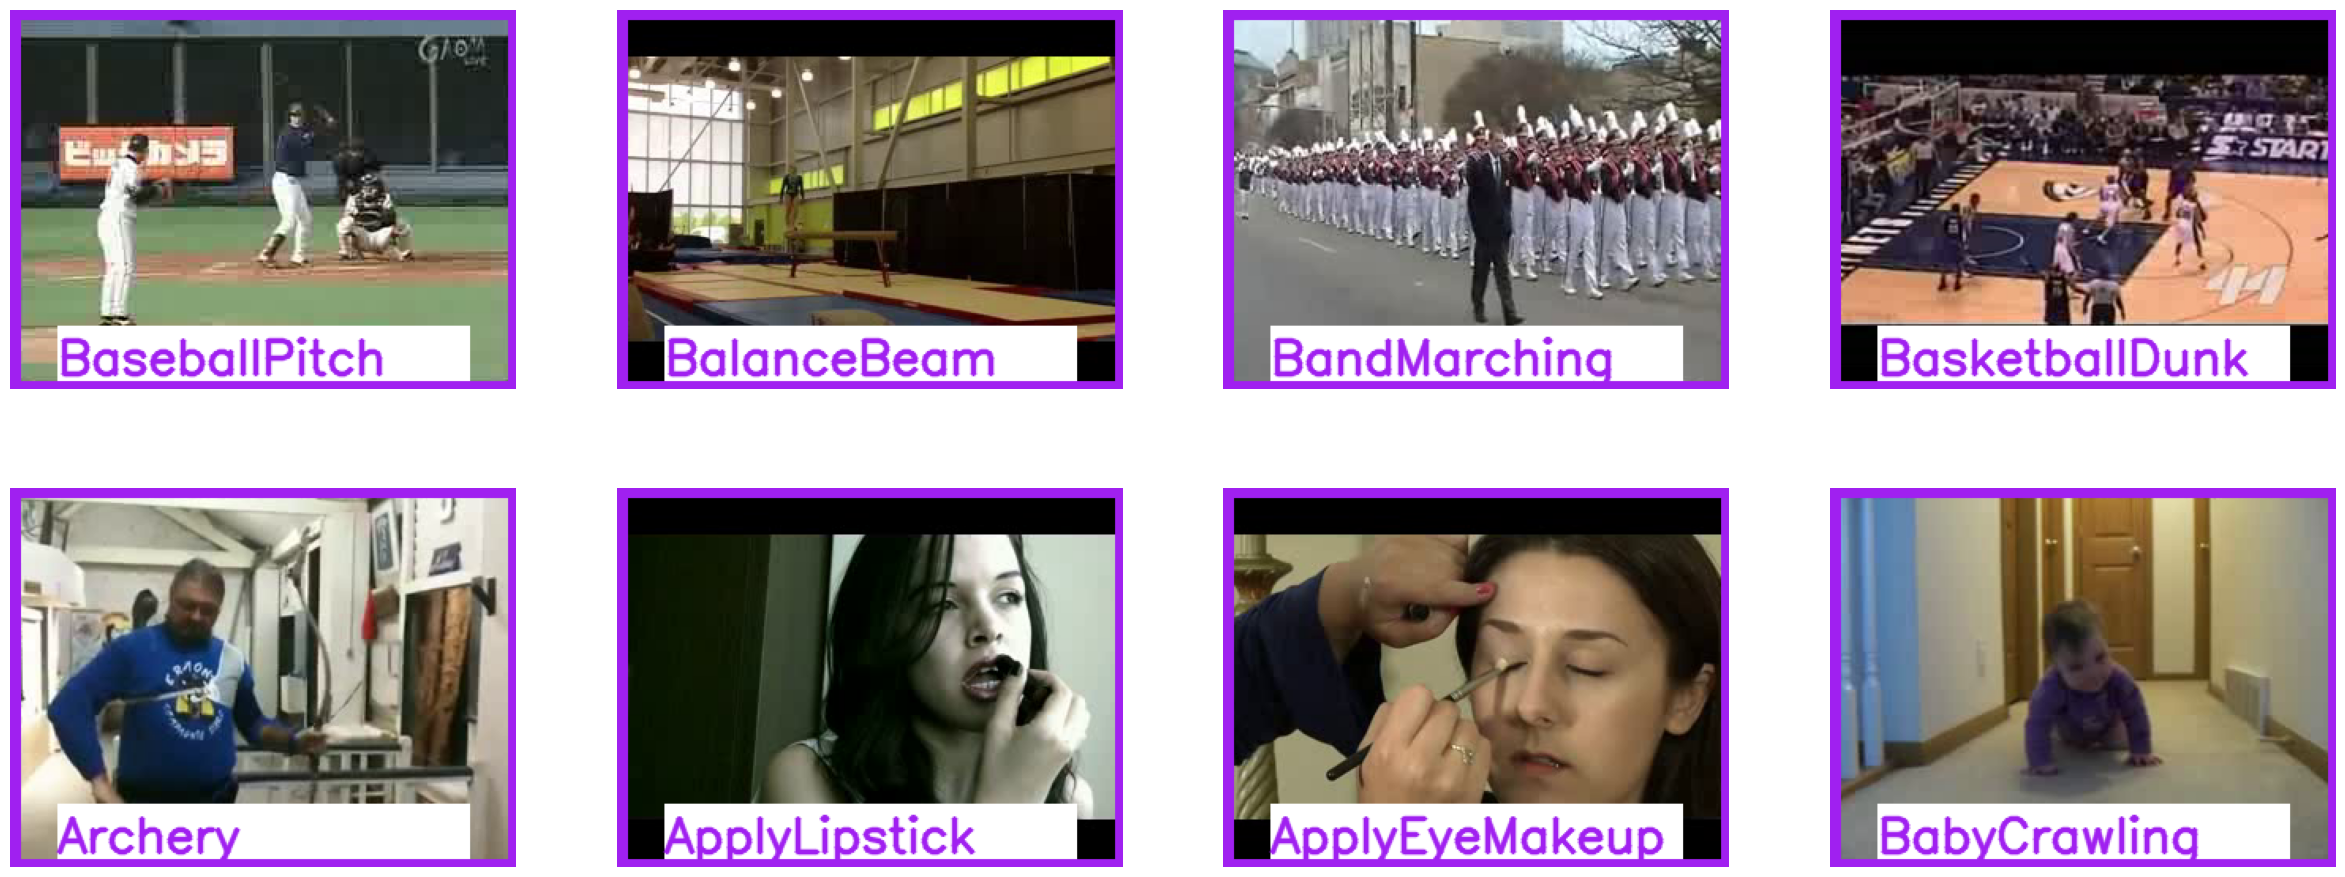

In [73]:
import random

# Create a Matplotlib figure
plt.figure(figsize = (30, 30))
 
# Get Names of all classes in UCF101
all_classes_names = label_data.labels.values
 
# Generate a random sample of images each time the cell runs
random_range = random.sample(range(len(all_classes_names[0:10])), 8)
 
# Iterating through all the random samples
for counter, random_index in enumerate(random_range, 1):
 
    # Getting Class Name using Random Index
    selected_class_Name = all_classes_names[random_index]
 
    # Getting a list of all the video files present in a Class Directory
    video_files_names_list = os.listdir(f'./data/UCF-101/{selected_class_Name}')
 
    # Randomly selecting a video file
    selected_video_file_name = random.choice(video_files_names_list)
 
    # Reading the Video File Using the Video Capture
    video_reader = cv2.VideoCapture(f'./data/UCF-101/{selected_class_Name}/{selected_video_file_name}')
     
    # Reading The First Frame of the Video File
    _, bgr_frame = video_reader.read()
 
    # Closing the VideoCapture object and releasing all resources. 
    video_reader.release()
 
    # Converting the BGR Frame to RGB Frame 
    rgb_frame = cv2.cvtColor(bgr_frame, cv2.COLOR_BGR2RGB)
 
    # Adding The Class Name Text on top of the Video Frame.
 
    cv2.rectangle(rgb_frame, (30, 200), (290, 240), (255,255,255), -1)
    cv2.putText(rgb_frame, selected_class_Name, (30, 230), cv2.FONT_HERSHEY_SIMPLEX, 1, (160,32,240), 2, cv2.LINE_AA)
    cv2.rectangle(rgb_frame, (1, 1), (320, 240), (160,32,240), 10)

    # Assigning the Frame to a specific position of a subplot
    plt.subplot(5, 4, counter)
    plt.imshow(rgb_frame)
    plt.axis('off')